In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('assginment_4.csv')

In [5]:
df.head(3)

,Weight,Price
0,2,35
1,4,60
2,5,20


In [6]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


In [7]:
df.shape

(7, 2)

In [8]:
mean_x= df['Weight'].mean()
print(mean_x)

4.571428571428571


In [11]:
mean_y= df['Price'].mean()
print(mean_y)

47.142857142857146


Text(0, 0.5, 'Price')

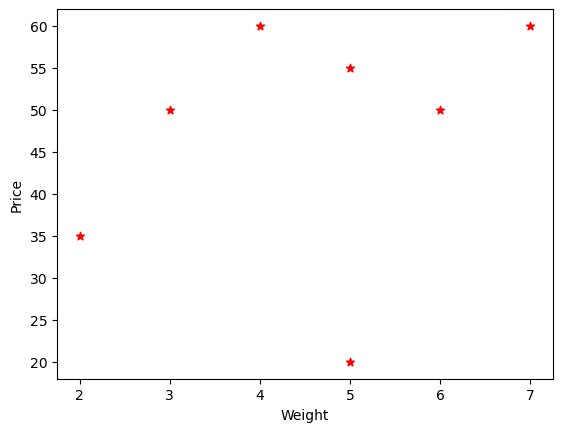

In [9]:
plt.scatter(df.Weight,df.Price, marker='*', color='red')
plt.xlabel('Weight')
plt.ylabel('Price')

In [12]:
nominator_m=((df['Weight']-mean_x)*(df['Price']-mean_y)).sum()
denominator_m=((df['Weight']-mean_x)**2).sum()
m=nominator_m/denominator_m
m

2.620967741935484

In [13]:
C=mean_y-m*mean_x
#Prize_6= m*6+C
df['Predict'] = df[['Weight']]*m + C

df

,Weight,Price,Predict
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [14]:
Prize_6= m*df['Weight'].iloc[4]+ C
print('when the vegetable weight is 6, price is: ',Prize_6)

when the vegetable weight is 6, price is:  50.88709677419355


In [15]:
df['residuals']= df['Price'] - df['Predict']
df['Price']=df['Price'].astype(int)
df


,Weight,Price,Predict,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


Text(0, 0.5, 'Price')

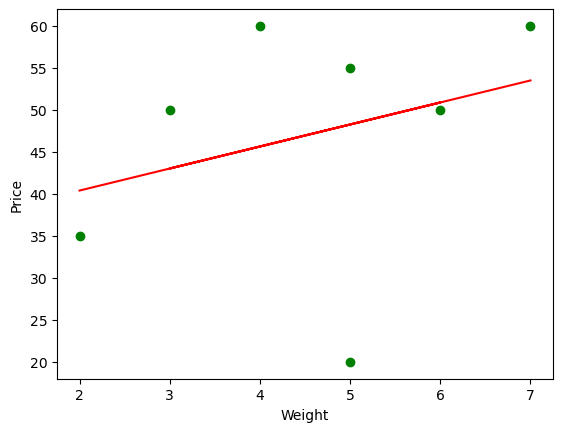

In [16]:
plt.scatter(df.Weight,df.Price,color='green')
plt.plot(df.Weight,df.Predict,color='red')
plt.xlabel("Weight")
plt.ylabel("Price")


In [17]:
#MSE
mse= (df['residuals']**2).sum() /7
print(f'Mean Squared Error: {mse:.3f}')
#MAE
mae= abs(df['residuals']).sum()/7
print(f'Mean Abs Error: {mae:.3f}')

Mean Squared Error: 167.310
Mean Abs Error: 9.873


#With Sk learn

In [6]:
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [7]:
reg= LinearRegression()
import pandas as pd
df= pd.read_csv('assginment_4.csv')

In [9]:
reg= LinearRegression()

In [10]:
x= df[['Weight']]
y= df[['Price']]
reg.fit(x,y)

LinearRegression()

In [14]:
reg.coef_ # m
print(reg.coef_)
reg.intercept_ # c
print(reg.intercept_)

[[2.62096774]]
[35.16129032]


In [15]:
reg.predict([[6]])

array([[50.88709677]])

In [16]:
df['residuals'] = df[['Price']] - reg.predict(x)

In [17]:
df['predict'] = reg.predict(x)
df

,Weight,Price,residuals,predict
0,2,35,-5.403226,40.403226
1,4,60,14.354839,45.645161
2,5,20,-28.266129,48.266129
3,3,50,6.975806,43.024194
4,6,50,-0.887097,50.887097
5,5,55,6.733871,48.266129
6,7,60,6.491935,53.508065


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
mse = mean_squared_error(df['Price'] , df['predict'])
mse

167.30990783410135

In [20]:
mae =mean_absolute_error(df['Price'] , df['predict'])
mae                         

9.87327188940092

In [ ]:
df.to_csv("Final_output.csv",index=f)